### RFR (ファイルからモデルを読み取る)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import load

In [11]:
# 下準備
csv_in = '../cs3-08/student-por-gp.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
X = df.drop(columns='G3')  # features
y = df['G3']  # true values    

# 整数割り当て
X['studytime'] = X['studytime'].replace(
    {'<2 hours':'1', '2 to 5 hours':'2',
     '5 to 10 hours':'3', '>10 hours':'4',
    }
).astype('int')
# ダミー変数化
X_dumm = pd.get_dummies(X, drop_first=True, dtype='uint8')

X_train, X_test, y_train, y_test = train_test_split(
    X_dumm, y, test_size=0.3, random_state=13)

### RFRの読み込み
- load(model_file)　ファイルの読み込み

In [9]:
tag = 'student-por'
model_file = 'rfr_{}.joblib'.format(tag)
rfr = load(model_file)　
print(rfr)

RandomForestRegressor(n_estimators=500, random_state=17)


### 予測

In [12]:
y_test_pred = rfr.predict(X_test)

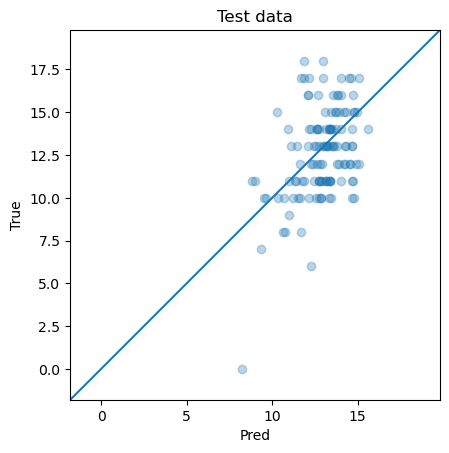

In [13]:
y_min = np.append(y_test_pred, y_test).min()
y_max = np.append(y_test_pred, y_test).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

plt.scatter(y_test_pred, y_test, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.title('Test data')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [15]:
mse = mean_squared_error(y_test, y_test_pred)
print('MSE: ', mse)
print("RMSE for test data: ", np.sqrt(mse))

MSE:  5.755409694620138
RMSE for test data:  2.3990434957749596


In [17]:
X_test2 = pd.DataFrame([[18, 4, 0, 0, 1, 1,
                        2, 0, 0, 0, 1],
                       [15, 1, 3, 1, 0, 4,
                        3, 10, 0, 1, 0],
                        ],
                        columns=X_dumm.columns)  # example
print('予測のためのX:')
display(X_test2)

予測のためのX:


,age,studytime,failures,schoolsup,higher,goout,health,absences,reason_home,reason_other,reason_reputation
0,18,4,0,0,1,1,2,0,0,0,1
1,15,1,3,1,0,4,3,10,0,1,0


In [18]:
y_test_pred2 = rfr.predict(X_test2)
print('予測 y:')
print(y_test_pred2)

予測 y:
[16.63   7.194]
